# NAME: DEBARSHI CHAKRABORTY

# DATA SCIENCE AND BUSINESS ANALYTICS INTERN @THE SPARKS FOUNDATION

# GRIP MAY 2021 - TASK 6:PREDICTION USING DECISION TREE ALGORITHM

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Check out the Data

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# EDA

In [4]:
df.shape

(150, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

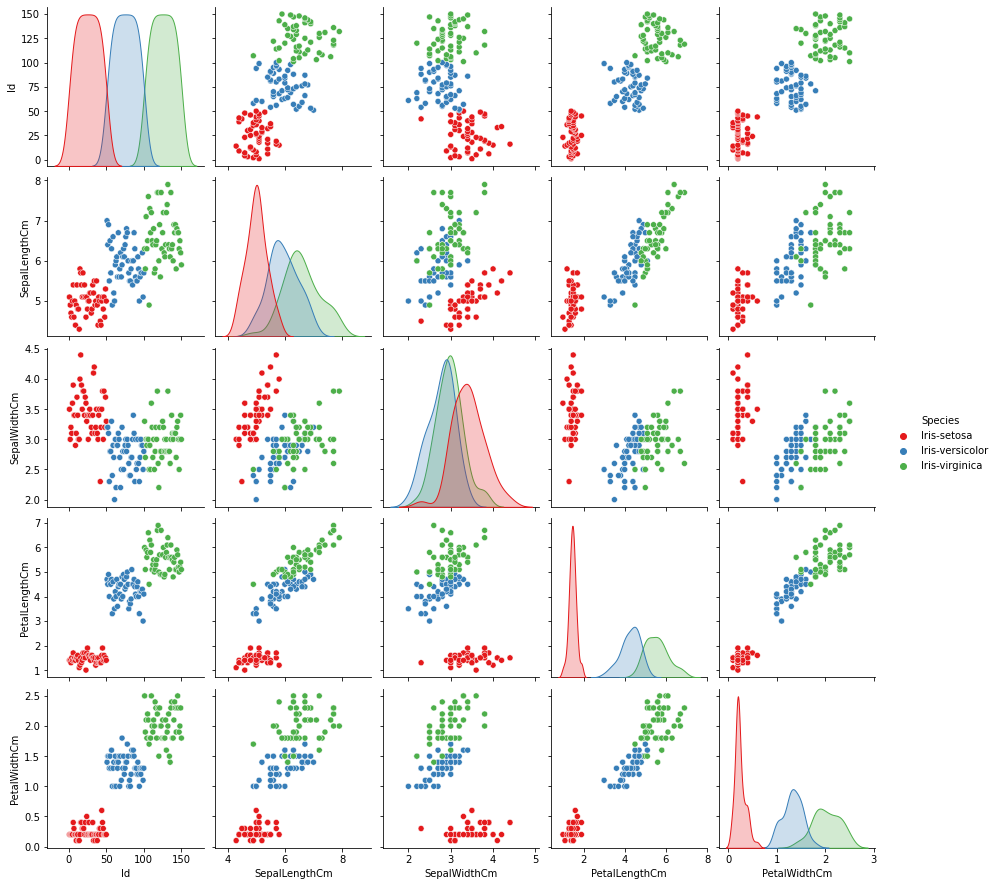

In [7]:
sns.pairplot(df,hue='Species',palette='Set1')

# Train test split

In [8]:
from sklearn.model_selection import train_test_split

**Prepare the data**

In [9]:
x = df.drop(['Species','Id'],axis=1)
y = df['Species']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

# Decision Tree

**Create a decision tree and fit it to the training data**

In [11]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

# Prediction and Evaluation

**Lets see how well our decision tree works**

In [12]:
predictions = dtree.predict(x_test)

In [13]:
df1 = pd.DataFrame(data=[predictions,y_test])

In [14]:
df1

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,Iris-virginica,Iris-setosa,Iris-virginica,Iris-setosa,Iris-versicolor,Iris-virginica,Iris-setosa,Iris-setosa,Iris-versicolor,Iris-versicolor,...,Iris-setosa,Iris-virginica,Iris-versicolor,Iris-virginica,Iris-virginica,Iris-versicolor,Iris-setosa,Iris-virginica,Iris-setosa,Iris-virginica
1,Iris-virginica,Iris-setosa,Iris-virginica,Iris-setosa,Iris-versicolor,Iris-virginica,Iris-setosa,Iris-setosa,Iris-versicolor,Iris-versicolor,...,Iris-setosa,Iris-virginica,Iris-versicolor,Iris-virginica,Iris-virginica,Iris-versicolor,Iris-setosa,Iris-virginica,Iris-setosa,Iris-virginica


In [15]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.85      1.00      0.92        17
 Iris-virginica       1.00      0.79      0.88        14

       accuracy                           0.93        45
      macro avg       0.95      0.93      0.93        45
   weighted avg       0.94      0.93      0.93        45



In [16]:
print(confusion_matrix(y_test,predictions))

[[14  0  0]
 [ 0 17  0]
 [ 0  3 11]]


**The performance is too beautiful** - *everything classified correctly*

# Tree Visualization

In [17]:
from IPython.display import Image  
from sklearn.tree import export_graphviz 
import pydot 
from six import StringIO

In [18]:
features = list(df.columns[1:5])
features

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

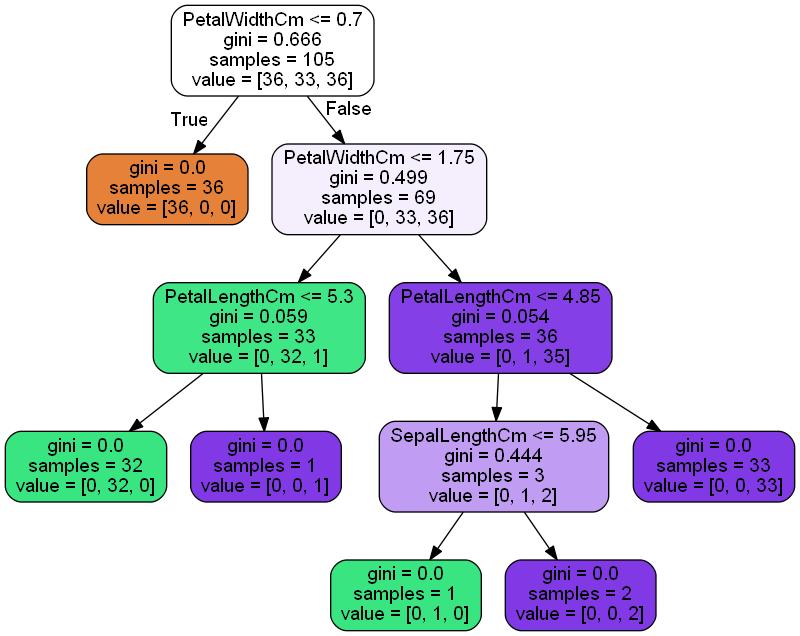

In [19]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
Image(graph[0].create_png())  